In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#fonte dos dados: https://www.esportsearnings.com/
#vale ressaltar que são dados até o final de 2020
times = pd.read_csv('highest_earning_teams.csv')

In [ ]:
#alguns times possuem o mesmo TeamId por fazerem parte da mesma empresa
times

# Visualização de Dados e algumas informações

### Relação entre os jogos e a quantidade de times:

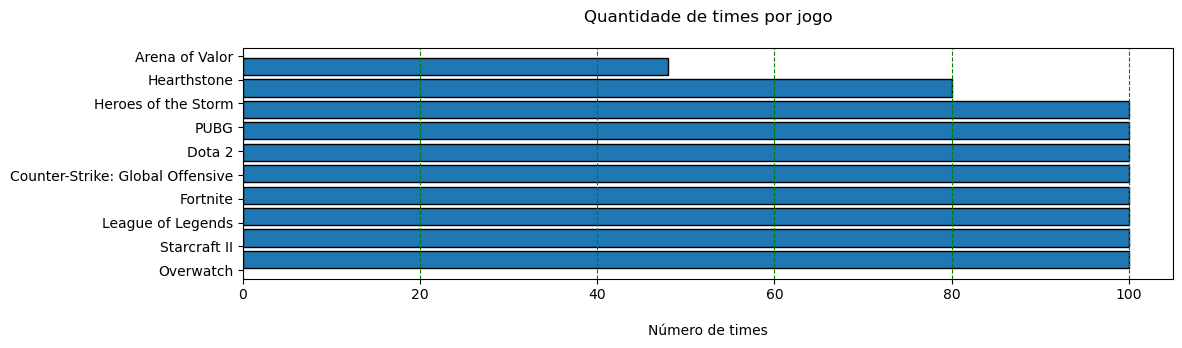

In [11]:
plt.figure(figsize=(12,3))
plt.hist(times['Game'], bins=10, orientation='horizontal', edgecolor='black', rwidth=0.8)
plt.grid(axis='x', linestyle='--', color='green')
plt.title('Quantidade de times por jogo\n')
plt.xlabel('\nNúmero de times')
plt.show()

### Dinheiro movimentado por cada jogo e gênero

In [12]:
#lista com todos os jogos, cada um uma unica vez
jogos = times['Game'].unique().tolist()

#lista com o total movimentado por cada jogo
usd_jogos = []

for i in range(len(jogos)):
    total = sum(times.loc[times['Game'] == jogos[i], 'TotalUSDPrize'].tolist())
    usd_jogos.append(total)

In [13]:
movimento_jogos = pd.DataFrame(index=jogos, data=usd_jogos, columns=['usd'])
teste = movimento_jogos['usd'].apply('{:,.2f}'.format)
movimento_jogos['usd_texto'] = teste

In [14]:
movimento_por_jogo = [f"{i} (USD {j})" for i, j in zip(jogos, movimento_jogos.usd_texto.tolist())]

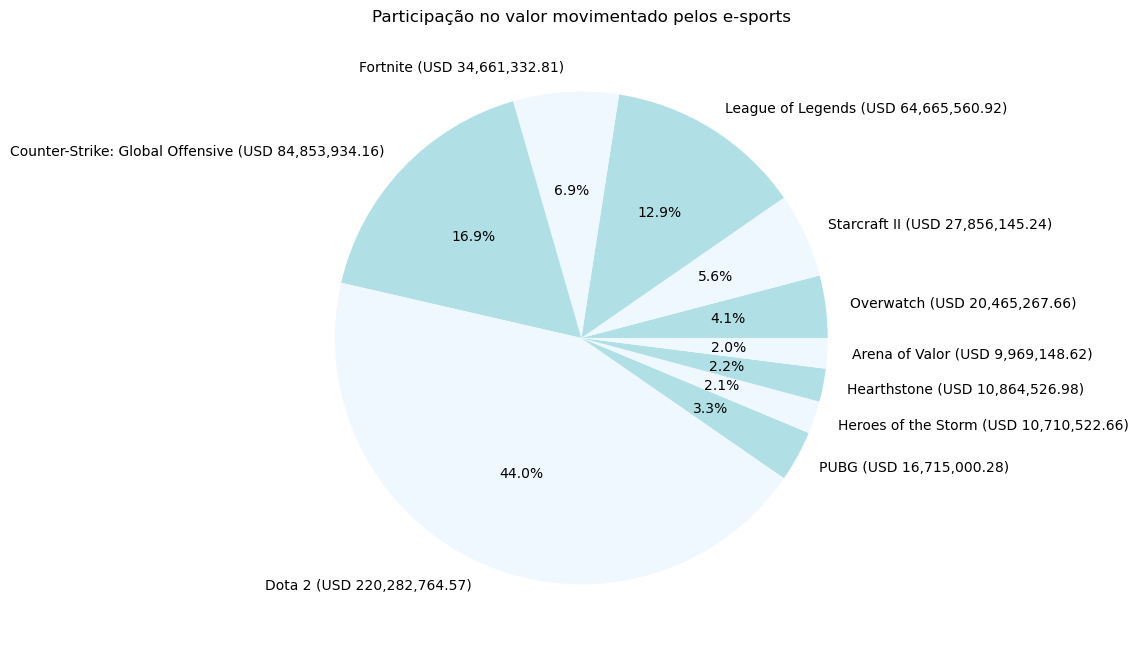

In [15]:
plt.figure(figsize=(10, 8))
cores = ['powderblue', 'aliceblue']
plt.pie(movimento_jogos['usd'], labels=movimento_por_jogo, autopct="%1.1f%%", colors=cores)
plt.title('Participação no valor movimentado pelos e-sports')

plt.show()

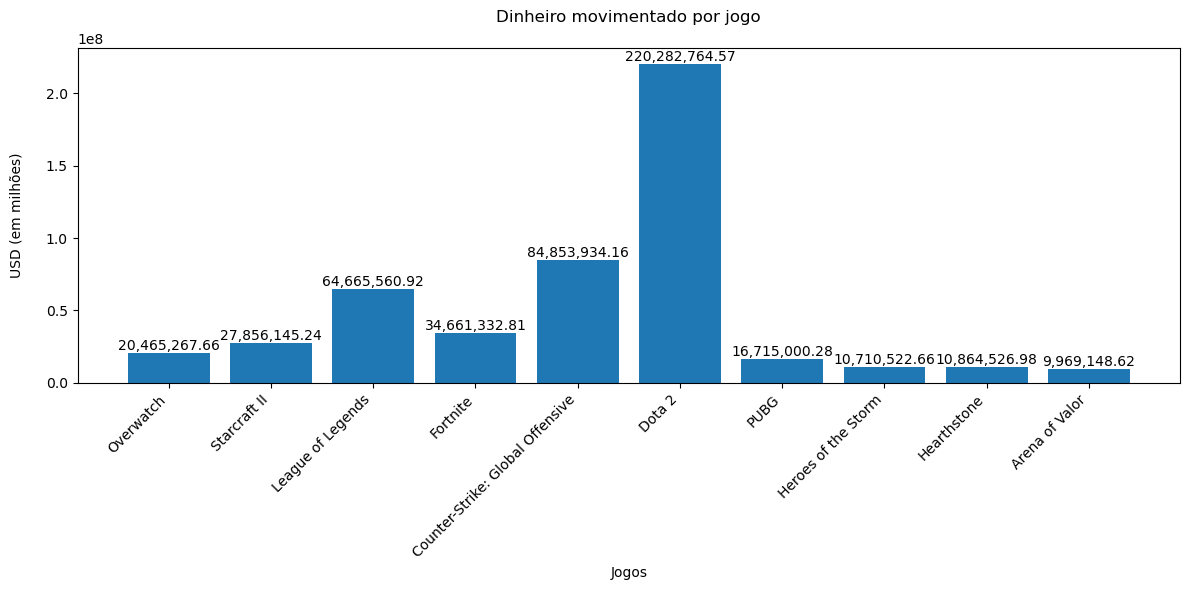

In [18]:
plt.figure(figsize=(12, 6)) 
plt.bar(movimento_jogos.index, movimento_jogos['usd'])

plt.title('Dinheiro movimentado por jogo\n')
plt.xlabel('Jogos')
plt.xticks(rotation=45, ha='right')
plt.ylabel('USD (em milhões)\n')

for i, j in enumerate(movimento_jogos['usd_texto']):
    plt.text(i, movimento_jogos['usd'][i], j, ha='center', va='bottom')

plt.tight_layout() 
plt.show()

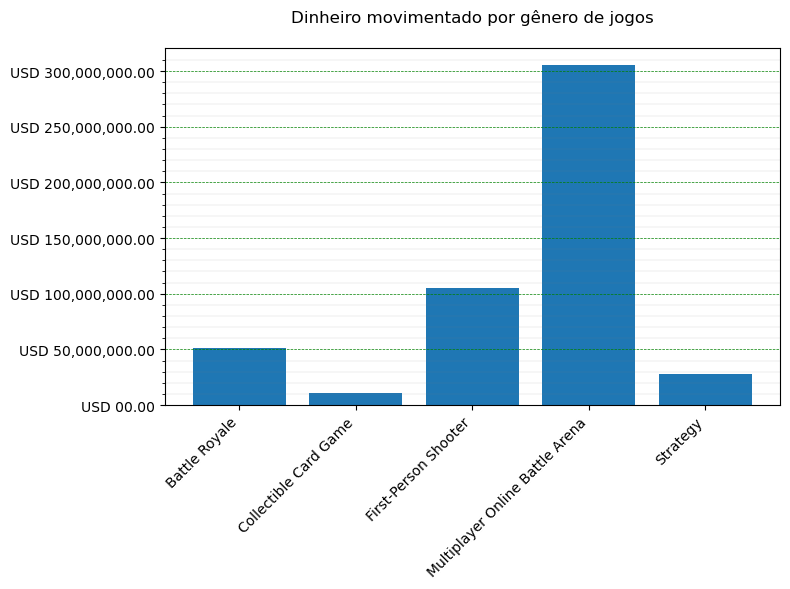

In [20]:
usd_por_genero = times.groupby(['Genre'])['TotalUSDPrize'].sum()
maximo = int(usd_por_genero.max())

plt.figure(figsize=(8,6))

plt.bar(usd_por_genero.index, usd_por_genero)
plt.title('Dinheiro movimentado por gênero de jogos\n')

plt.xticks(rotation = 45, ha = 'right')
plt.yticks(np.arange(0, 310000001, 50000000),
          labels=["USD 00.00", "USD 50,000,000.00",
                  "USD 100,000,000.00","USD 150,000,000.00",
                  "USD 200,000,000.00","USD 250,000,000.00","USD 300,000,000.00"]
          )
plt.yticks(np.arange(0, 310000001, 10000000), minor=True)


plt.grid(which='major', linestyle='--', linewidth='0.5', color='green', axis='y')
plt.grid(which='minor', linestyle='-', linewidth='0.1', color='grey')

plt.tight_layout()
plt.show()

### Relação entre torneios jogados e USD conquistados (para times de Overwatch):

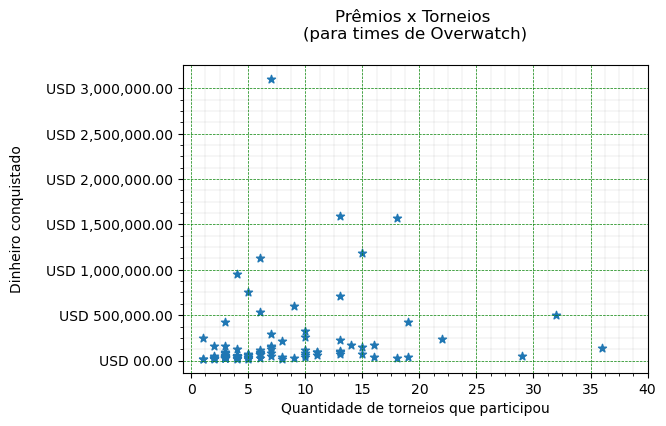

In [21]:
overwatch = times.loc[times['Game'] == 'Overwatch']

plt.figure(figsize=(6,4))
plt.scatter(x = overwatch['TotalTournaments'], y = overwatch['TotalUSDPrize'], marker = '*')
plt.title('Prêmios x Torneios \n(para times de Overwatch)\n')
plt.xlabel('Quantidade de torneios que participou')
plt.ylabel('Dinheiro conquistado\n')


plt.xticks(np.arange(0, 41, 5))
plt.yticks(np.arange(0, 3000001, 500000),
          labels=["USD 00.00", "USD 500,000.00","USD 1,000,000.00","USD 1,500,000.00", "USD 2,000,000.00", "USD 2,500,000.00","USD 3,000,000.00"]
          )

plt.xticks(np.arange(0, 41, 1.25), minor=True) 
plt.yticks(np.arange(0, 3000001, 125000), minor=True)

plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='-', linewidth='0.1', color='grey')

plt.show()

#### participar de muitos torneios não implica em ter uma grande quantidade de USD conquistados

# Informação Geográfica

### Países com times de Overwatch

In [64]:
times_overwatch = overwatch['TeamName'].tolist()

In [65]:
#com a saída da lista criada acima, pedi para uma IA criar uma tabela com o pais de origem de cada time
#formatado no excel e exportado para csv
paises = pd.read_csv('times_paises.csv')
paises.shape

(100, 2)

In [66]:
# Times brasileiros de Overwatch:
print(paises.loc[paises['país'] == 'Brasil']['time'].tolist())

['Blank Esports', 'Brazilian National Team', 'Snake Esports']


In [67]:
agrupado = paises.groupby('país')['time'].count().sort_values(ascending=False)
df = pd.DataFrame(agrupado)
paises_mais = df.iloc[0:11,:] #paises com 3 times ou mais
paises_menos = df.iloc[11:,:] #paises com até 2 times

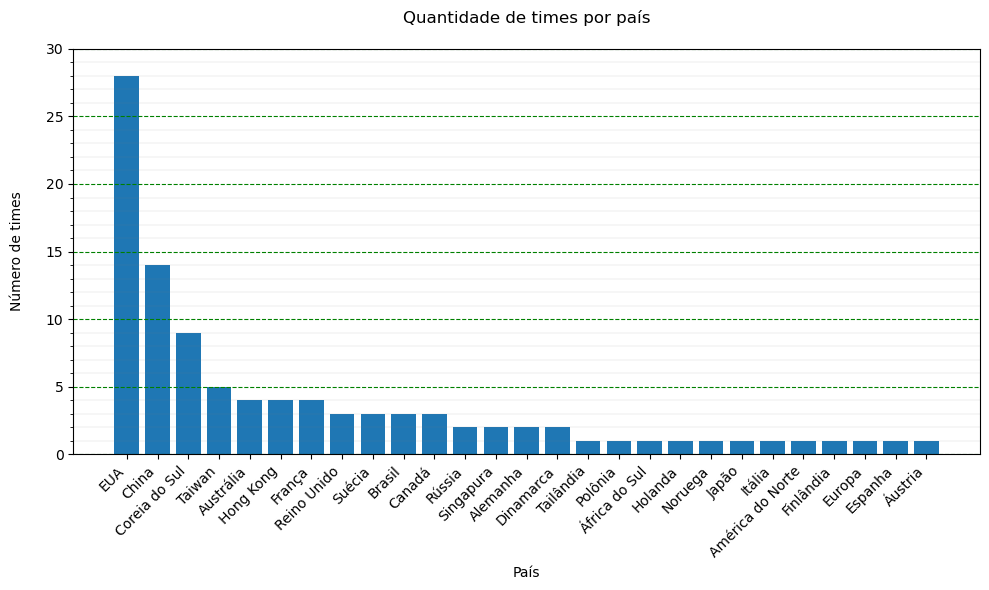

In [68]:
plt.figure(figsize=(10, 6))
plt.bar(agrupado.index, agrupado.values)
plt.grid(axis='y', linestyle='--', color='green')
plt.title('Quantidade de times por país\n')

plt.xlabel('País')
plt.xticks(rotation=45, ha='right')


plt.ylabel('Número de times\n')
plt.yticks(np.arange(0, 31, 1), minor=True)

plt.grid(which='minor', linestyle='-', linewidth='0.1', color='grey')

plt.tight_layout() 
plt.show()